## Food demand forcasting
### the aim is to find the number of orders for the features for the next 10 weeks


In [11]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
fullfillmentInfo=pd.read_csv(r"D:\Polestar Solutions\train_GzS76OK\fulfilment_center_info.csv")
mealInfo=pd.read_csv(r"D:\Polestar Solutions\train_GzS76OK\meal_info.csv")
train=pd.read_csv(r"D:\Polestar Solutions\train_GzS76OK\train.csv")
fullfillmentInfo.head()
trainMeal = pd.merge(train, mealInfo, on='meal_id',how='left')
df = pd.merge(trainMeal, fullfillmentInfo, on='center_id',how='left')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


## there's a difference in checkout_price and base_price suggesting probably discounts and offers

In [12]:
df['discount']=(df['base_price']-df['checkout_price'])/df['base_price']
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,0.101517
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,-0.007362
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,0.007361
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0,0.224053
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0,-0.004124


## there's negetive values in the discount column suggesting annomaly

In [13]:
negative_discounts = df[df['discount'] < 0]
negative_discounts

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,-0.007362
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0,-0.004124
8,1025244,1,55,2707,193.06,192.06,0,0,472,Beverages,Italian,647,56,TYPE_C,2.0,-0.005207
12,1446016,1,55,2290,311.43,310.43,0,0,162,Rice Bowl,Indian,647,56,TYPE_C,2.0,-0.003221
15,1181556,1,55,2640,282.33,281.33,0,0,108,Starters,Thai,647,56,TYPE_C,2.0,-0.003555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456533,1176475,145,61,1902,446.23,445.23,0,0,69,Biryani,Indian,473,77,TYPE_A,4.5,-0.002246
456537,1371867,145,61,1962,548.08,547.08,0,0,256,Pizza,Continental,473,77,TYPE_A,4.5,-0.001828
456538,1055597,145,61,1445,728.53,726.53,0,0,54,Seafood,Continental,473,77,TYPE_A,4.5,-0.002753
456541,1010438,145,61,2704,321.13,320.13,0,0,67,Other Snacks,Thai,473,77,TYPE_A,4.5,-0.003124


## the negetive values are almost 25% of the data

## 

In [14]:
negative_discounts 

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,-0.007362
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0,-0.004124
8,1025244,1,55,2707,193.06,192.06,0,0,472,Beverages,Italian,647,56,TYPE_C,2.0,-0.005207
12,1446016,1,55,2290,311.43,310.43,0,0,162,Rice Bowl,Indian,647,56,TYPE_C,2.0,-0.003221
15,1181556,1,55,2640,282.33,281.33,0,0,108,Starters,Thai,647,56,TYPE_C,2.0,-0.003555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456533,1176475,145,61,1902,446.23,445.23,0,0,69,Biryani,Indian,473,77,TYPE_A,4.5,-0.002246
456537,1371867,145,61,1962,548.08,547.08,0,0,256,Pizza,Continental,473,77,TYPE_A,4.5,-0.001828
456538,1055597,145,61,1445,728.53,726.53,0,0,54,Seafood,Continental,473,77,TYPE_A,4.5,-0.002753
456541,1010438,145,61,2704,321.13,320.13,0,0,67,Other Snacks,Thai,473,77,TYPE_A,4.5,-0.003124


<Axes: xlabel='week', ylabel='discount'>

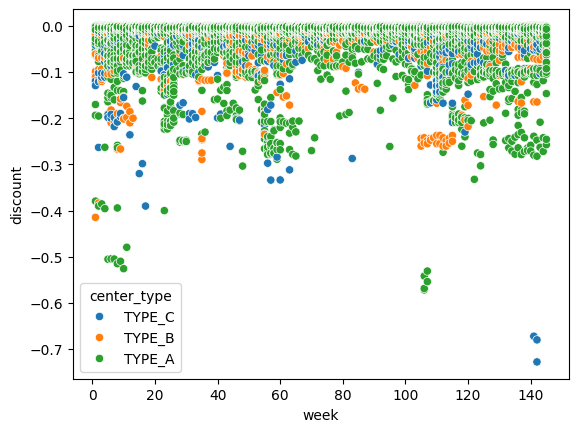

In [15]:
import seaborn as sns
sns.scatterplot(data=negative_discounts, x="week", y="discount", hue="center_type")

## type A center_type has the most negetive discount 

<Axes: xlabel='week', ylabel='discount'>

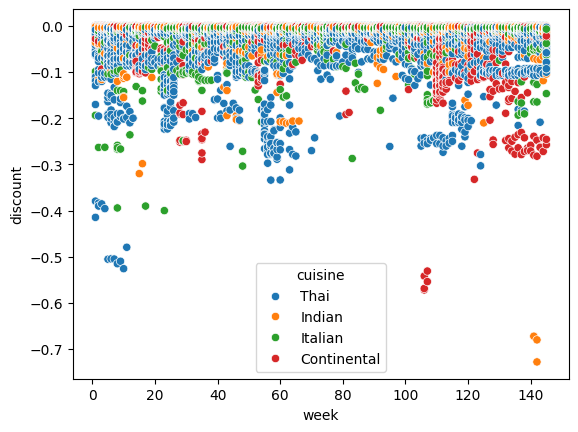

In [16]:
import seaborn as sns
sns.scatterplot(data=negative_discounts, x="week", y="discount", hue="cuisine")

## thai food also has negetive discounts

<Axes: xlabel='week', ylabel='discount'>

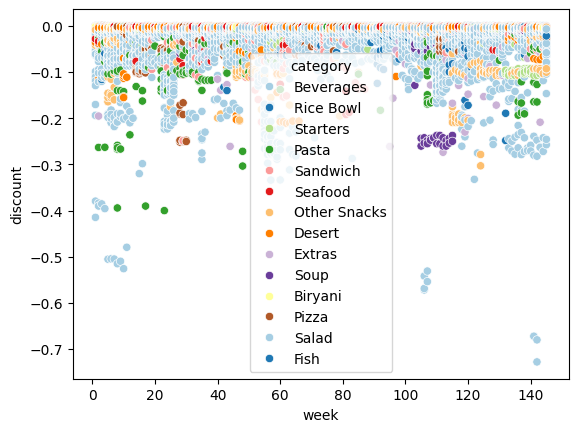

In [17]:
import seaborn as sns
sns.scatterplot(data=negative_discounts, x="week", y="discount", hue="category",palette='Paired')

## beverages has the most negetive discounts

<Axes: xlabel='week', ylabel='discount'>

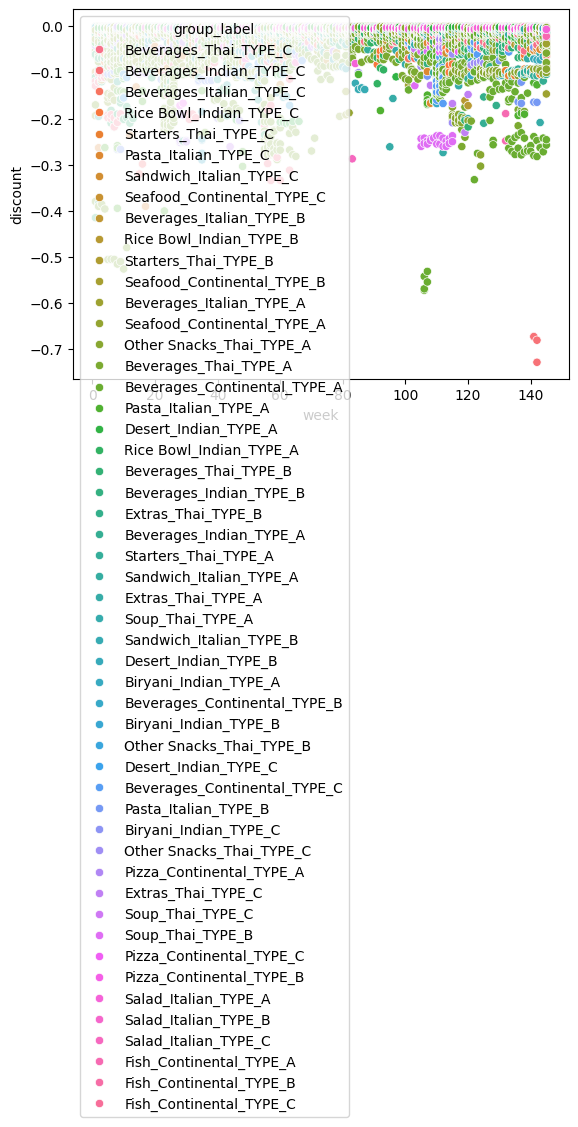

In [18]:
# Add a new column to represent group labels
negative_discounts['group_label'] = (negative_discounts['category'].astype(str) + "_" +
                                     negative_discounts['cuisine'].astype(str) + "_" +
                                     negative_discounts['center_type'].astype(str))
                                   
# Use the group label as the hue
sns.scatterplot(x='week', y='discount', hue='group_label', data=negative_discounts,legend=True)


## most of the negetive discounts are from center type A

In [19]:
from scipy.stats import kendalltau
import pandas as pd

def kendallTau(colmnsToRelateWith, threshold=0.9):  # Add threshold parameter
    results = []
    numeric_cols = colmnsToRelateWith.select_dtypes(include=['number']).columns

    for i in range(len(numeric_cols)):
        for j in range(i + 1, len(numeric_cols)): 
            col1, col2 = numeric_cols[i], numeric_cols[j]
            corr, kendall_value = kendalltau(colmnsToRelateWith[col1], colmnsToRelateWith[col2])

            # Filter based on the absolute value of Kendall Tau correlation
            if abs(corr) >= threshold:
                results.append({
                    'Column1': col1,
                    'Column2': col2,
                    'Correlation': corr,
                    'KendallTau-Value': kendall_value
                })
    return pd.DataFrame(results)

# Usage
correlationColumns = df.columns
colmnsToRelateWith = df[correlationColumns].copy()
threshold = 0.2  # Set your desired threshold
kendalTauPairs = kendallTau(colmnsToRelateWith, threshold=threshold)
kendalTauPairs.to_csv(r"C:\Users\Abhirami\Documents\kendallvalue_filtered.csv", index=False)

kendalTauPairs.head()


,Column1,Column2,Correlation,KendallTau-Value
0,checkout_price,base_price,0.861806,0.0
1,checkout_price,num_orders,-0.262467,0.0
2,base_price,num_orders,-0.230010,0.0
3,emailer_for_promotion,homepage_featured,0.390534,0.0
4,emailer_for_promotion,discount,0.317336,0.0


## We find the most correlated value to the target and with kendalltau_threshold>=.9: 
* 1. checkout_price
* 2. base_price

In [21]:
import IPython.display
from scipy.stats import pearsonr


def pTest(colmnsToRelateWith):
        results = []
        high_p_value_pairs = []  
        numeric_cols = colmnsToRelateWith.select_dtypes(include=['number']).columns

        for i in range(len(numeric_cols)):
            for j in range(i + 1, len(numeric_cols)): 
                col1, col2 = numeric_cols[i], numeric_cols[j]
                corr, p_value = pearsonr(colmnsToRelateWith[col1], colmnsToRelateWith[col2])               
                if p_value < 0.1:
                    high_p_value_pairs.append({
                        'Column1': col1,
                        'Column2': col2,
                        'Correlation': corr, 
                        'P-Value': p_value
                    })
                results.append({
                    'Column1': col1,
                    'Column2': col2,
                    'Correlation': corr,
                    'P-Value': p_value
                })

        result_df = pd.DataFrame(results)
        low_p_value_pairs_df = pd.DataFrame(high_p_value_pairs)  
        return result_df, low_p_value_pairs_df

correlationColumns=df.columns
colmnsToRelateWith = df[correlationColumns].copy()
result_df,low_p_value_pairs_df=pTest(colmnsToRelateWith)

low_p_value_pairs_df.to_csv(r"C:\Users\Abhirami\Documents\lowpvalues.csv", index=False)

low_p_value_pairs_df.head()

,Column1,Column2,Correlation,P-Value
0,id,center_id,0.002641,0.074306
1,id,base_price,0.002909,0.049315
2,id,homepage_featured,0.003111,0.035562
3,id,discount,0.002910,0.049296
4,week,center_id,-0.003450,0.019753


## We find the most correlated value to the target and with p-values less than 0.1 as:
* 1. homepage_featured
* 2. emailer_for_promotion
* 3. discount
* 4. op_area
* 5. checkout_price (negetive correlation)
* 6. base_price (negetive correlation)

## so the features we need to take consider are
* 1. checkout_price
* 2. base_price
* 3. homepage_featured
* 4. emailer_for_promotion
* 5. discount
* 6. op_area

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
columns = ['checkout_price', 'base_price', 'homepage_featured', 
           'emailer_for_promotion', 'discount', 'op_area']

dataToCorrelate = df[columns].copy()
dataToCorrelate = dataToCorrelate.select_dtypes(include=['number'])
vif = pd.DataFrame()
vif['Variable'] = dataToCorrelate.columns
vif['VIF'] = [variance_inflation_factor(dataToCorrelate.values, i) 
              for i in range(dataToCorrelate.shape[1])]

greaterThreshold = vif[vif['VIF'] > 10]['Variable'].tolist()

greaterThreshold


['checkout_price', 'base_price']

# VIF for checkout_price and base_price is high
### so we just select one feature which is checkout_price, as it's the discounts and offers that determine more number of orders
### <li>checkout_price</li>
### <li>homepage_featured</li>
### <li>emmailer_for_promotion</li>
### <li>discount</li>
### <li>op_area</li>